In [39]:
%matplotlib notebook

In [40]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # for Chart and plot
import math 
import seaborn as sns

# csv Files to Load 
clinicaltrial_data_to_load = "clinicaltrial_data.csv"
mouse_drug_data_to_load = "mouse_drug_data.csv"

# Read clinicaltrial Data File and store into Pandas Data Frames
clinicaltrial_data = pd.read_csv(clinicaltrial_data_to_load)
# clinicaltrial_data

# Read mouse drug data file
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
# mouse_drug_data

# # # Combine the data into a single dataset
Pymaceuticals_data_complete = pd.merge(clinicaltrial_data, mouse_drug_data, how="inner", on=["Mouse ID", "Mouse ID"])

# Pymaceuticals_data_complete.drop_duplicates(keep="first")
# Pymaceuticals_data_complete

In [41]:
# Data frame grouped on 'Drug' and 'Timepoint' & min function used to aggregate 
Pymaceuticals_analysis_min = Pymaceuticals_data_complete
Pymaceuticals_analysis_min = Pymaceuticals_analysis_min.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'min', 'Drug' : 'min'
                                                                                   ,'Timepoint' : 'min'
                                                                                  })

Pymaceuticals_analysis_min

Tumor Volume (mm3)       Drug  Timepoint
Drug      Timepoint                                          
Capomulin 0                   45.000000  Capomulin          0
          5                   38.796474  Capomulin          5
          10                  35.624403  Capomulin         10
          15                  32.623003  Capomulin         15
          20                  30.485985  Capomulin         20
          25                  33.118756  Capomulin         25
          30                  31.758275  Capomulin         30
          35                  28.328531  Capomulin         35
          40                  25.472143  Capomulin         40
          45                  23.343598  Capomulin         45
Ceftamin  0                   45.000000   Ceftamin          0
          5                   45.546076   Ceftamin          5
          10                  46.501476   Ceftamin         10
          15                  47.242929   Ceftamin         15
          20                  49.554263   Ceftamin         20
          25                  51.869059   Ceftamin         25
          30                  54.444713   Ceftamin         30
          35                  55.118290   Ceftamin         35
          40                  57.197193   Ceftamin         40
          45                  59.741901   Ceftamin         45
Infubinol 0                   45.000000  Infubinol          0
          5                   45.477544  Infubinol          5
          10                  47.222446  Infubinol         10
          15                  48.352239  Infubinol         15
          20                  49.490559  Infubinol         20
          25                  51.939951  Infubinol         25
          30                  54.363797  Infubinol         30
          35                  55.629428  Infubinol         35
          40                  58.315593  Infubinol         40
          45                  60.918767  Infubinol         45
...                                 ...        ...        ...
Ramicane  0                   45.000000   Ramicane          0
          5                   38.711872   Ramicane          5
          10                  34.850998   Ramicane         10
          15                  34.223992   Ramicane         15
          20                  32.997729   Ramicane         20
          25                  33.205008   Ramicane         25
          30                  31.099498   Ramicane         30
          35                  26.546993   Ramicane         35
          40                  24.365505   Ramicane         40
          45                  22.050126   Ramicane         45
Stelasyn  0                   45.000000   Stelasyn          0
          5                   45.751727   Stelasyn          5
          10                  46.233844   Stelasyn         10
          15                  47.836852   Stelasyn         15
          20                  50.358069   Stelasyn         20
          25                  52.129804   Stelasyn         25
          30                  53.401667   Stelasyn         30
          35                  55.240962   Stelasyn         35
          40                  56.691723   Stelasyn         40
          45                  60.122011   Stelasyn         45
Zoniferol 0                   45.000000  Zoniferol          0
          5                   45.523014  Zoniferol          5
          10                  46.818176  Zoniferol         10
          15                  48.077646  Zoniferol         15
          20                  49.202054  Zoniferol         20
          25                  50.970689  Zoniferol         25
          30                  52.747718  Zoniferol         30
          35                  54.810813  Zoniferol         35
          40                  56.994816  Zoniferol         40
          45                  60.752704  Zoniferol         45

[100 rows x 3 columns]

In [42]:
# Data frame grouped on 'Drug' and 'Timepoint' & min, sem functions used to aggregate 
Pymaceuticals_analysis_sem = Pymaceuticals_data_complete
Pymaceuticals_analysis_sem = Pymaceuticals_analysis_sem.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'sem', 'Drug' : 'min'
                                                                                   ,'Timepoint' : 'min'
                                                                                  })
Pymaceuticals_analysis_sem

Tumor Volume (mm3)       Drug  Timepoint
Drug      Timepoint                                          
Capomulin 0                    0.000000  Capomulin          0
          5                    0.448593  Capomulin          5
          10                   0.702684  Capomulin         10
          15                   0.838617  Capomulin         15
          20                   0.909731  Capomulin         20
          25                   0.881642  Capomulin         25
          30                   0.934460  Capomulin         30
          35                   1.052241  Capomulin         35
          40                   1.223608  Capomulin         40
          45                   1.223977  Capomulin         45
Ceftamin  0                    0.000000   Ceftamin          0
          5                    0.164505   Ceftamin          5
          10                   0.236144   Ceftamin         10
          15                   0.332053   Ceftamin         15
          20                   0.359482   Ceftamin         20
          25                   0.439356   Ceftamin         25
          30                   0.490620   Ceftamin         30
          35                   0.692248   Ceftamin         35
          40                   0.708505   Ceftamin         40
          45                   0.902358   Ceftamin         45
Infubinol 0                    0.000000  Infubinol          0
          5                    0.235102  Infubinol          5
          10                   0.282346  Infubinol         10
          15                   0.357705  Infubinol         15
          20                   0.476210  Infubinol         20
          25                   0.550315  Infubinol         25
          30                   0.631061  Infubinol         30
          35                   0.984155  Infubinol         35
          40                   1.055220  Infubinol         40
          45                   1.144427  Infubinol         45
...                                 ...        ...        ...
Ramicane  0                    0.000000   Ramicane          0
          5                    0.482955   Ramicane          5
          10                   0.720225   Ramicane         10
          15                   0.770432   Ramicane         15
          20                   0.786199   Ramicane         20
          25                   0.746991   Ramicane         25
          30                   0.864906   Ramicane         30
          35                   0.967433   Ramicane         35
          40                   1.128445   Ramicane         40
          45                   1.226805   Ramicane         45
Stelasyn  0                    0.000000   Stelasyn          0
          5                    0.239862   Stelasyn          5
          10                   0.433678   Stelasyn         10
          15                   0.493261   Stelasyn         15
          20                   0.621889   Stelasyn         20
          25                   0.741922   Stelasyn         25
          30                   0.899548   Stelasyn         30
          35                   1.003186   Stelasyn         35
          40                   1.410435   Stelasyn         40
          45                   1.576556   Stelasyn         45
Zoniferol 0                    0.000000  Zoniferol          0
          5                    0.188950  Zoniferol          5
          10                   0.263949  Zoniferol         10
          15                   0.370544  Zoniferol         15
          20                   0.533182  Zoniferol         20
          25                   0.602513  Zoniferol         25
          30                   0.800043  Zoniferol         30
          35                   0.881426  Zoniferol         35
          40                   0.998515  Zoniferol         40
          45                   1.003576  Zoniferol         45

[100 rows x 3 columns]

In [43]:
# Data frame pivoted on Timepoint and Drugs 
Pymaceuticals_pivot = Pymaceuticals_analysis_min.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Pymaceuticals_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,38.796474,45.546076,45.477544,45.694188,45.656978,45.691124,45.544700,38.711872,45.751727,45.523014
10,35.624403,46.501476,47.222446,46.658395,47.013567,46.392688,46.606947,34.850998,46.233844,46.818176
15,32.623003,47.242929,48.352239,47.777936,48.430411,47.671236,47.673029,34.223992,47.836852,48.077646
20,30.485985,49.554263,49.490559,49.762415,49.253309,49.258126,49.110050,32.997729,50.358069,49.202054
25,33.118756,51.869059,51.939951,51.828357,51.386419,51.104421,51.846381,33.205008,52.129804,50.970689
30,31.758275,54.444713,54.363797,55.341342,54.688215,52.648893,53.597038,31.099498,53.401667,52.747718
35,28.328531,55.118290,55.629428,56.479113,57.122419,53.713158,55.679997,26.546993,55.240962,54.810813
40,25.472143,57.197193,58.315593,60.233733,59.830507,55.987676,56.842435,24.365505,56.691723,56.994816


In [44]:
# Resetting the indes that had formed
Pymaceuticals_pivot_reset=Pymaceuticals_pivot.reset_index()
Pymaceuticals_pivot_reset 

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,38.796474,45.546076,45.477544,45.694188,45.656978,45.691124,45.544700,38.711872,45.751727,45.523014
2,10,35.624403,46.501476,47.222446,46.658395,47.013567,46.392688,46.606947,34.850998,46.233844,46.818176
3,15,32.623003,47.242929,48.352239,47.777936,48.430411,47.671236,47.673029,34.223992,47.836852,48.077646
4,20,30.485985,49.554263,49.490559,49.762415,49.253309,49.258126,49.110050,32.997729,50.358069,49.202054
5,25,33.118756,51.869059,51.939951,51.828357,51.386419,51.104421,51.846381,33.205008,52.129804,50.970689
6,30,31.758275,54.444713,54.363797,55.341342,54.688215,52.648893,53.597038,31.099498,53.401667,52.747718
7,35,28.328531,55.118290,55.629428,56.479113,57.122419,53.713158,55.679997,26.546993,55.240962,54.810813
8,40,25.472143,57.197193,58.315593,60.233733,59.830507,55.987676,56.842435,24.365505,56.691723,56.994816
9,45,23.343598,59.741901,60.918767,62.909441,62.670759,58.634971,58.633404,22.050126,60.122011,60.752704


In [45]:
# finding the max of Timepoint to get the range
x_axis_range = Pymaceuticals_pivot_reset['Timepoint'].max()
x_axis_range

45

<IPython.core.display.Javascript object>


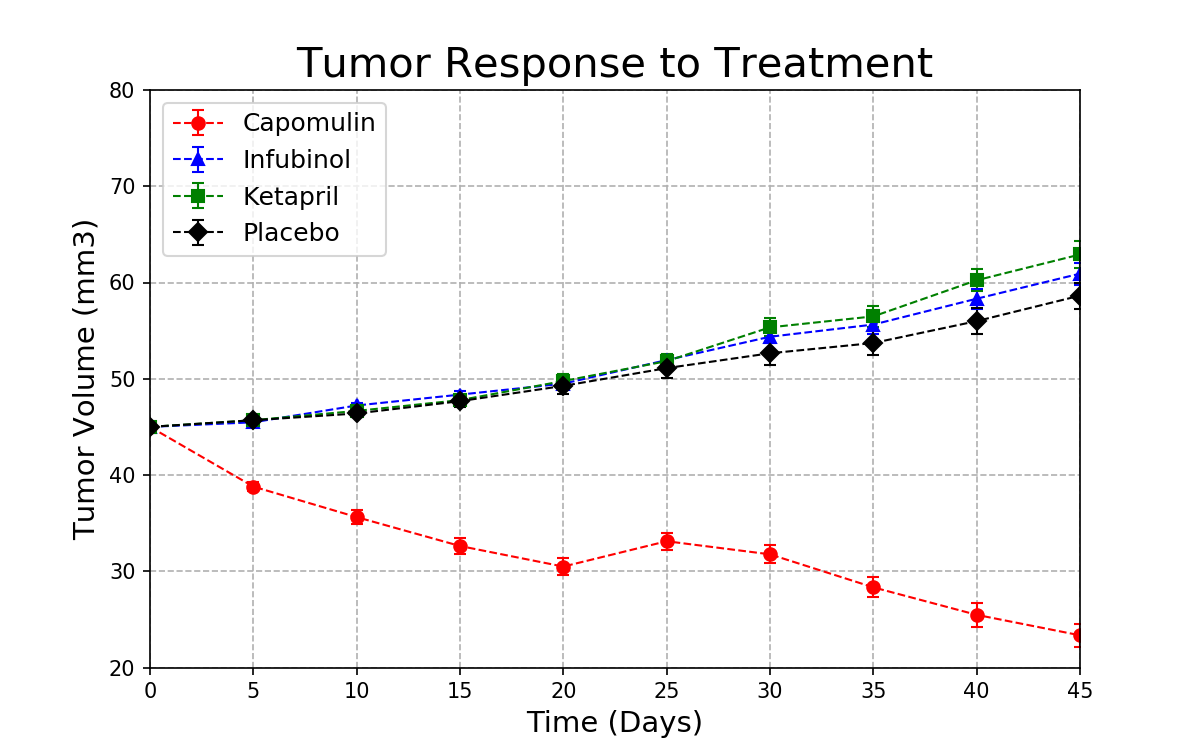

In [46]:
# Create a list from 0 to 55 with each step being 5 higher than the last# Create  
# plt.figure()

x_axis = np.arange(0,x_axis_range+5, 5)

# x_axis = [0,5,10,15,20,25,30,35,40,45]

x_limit = 45 

plt.figure(figsize=(8,5))

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, Pymaceuticals_pivot_reset["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, Pymaceuticals_pivot_reset["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, Pymaceuticals_pivot_reset["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, Pymaceuticals_pivot_reset["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, x_limit)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [47]:
# Second Scatter Plot

In [48]:
Pymaceuticals_data_metastatic_sites = Pymaceuticals_data_complete
Pymaceuticals_data_metastatic_sites = Pymaceuticals_data_metastatic_sites.groupby(['Drug','Metastatic Sites']).agg({
                                                                                   'Metastatic Sites' : 'min'
                                                                                    ,'Timepoint' : 'min'
                                                                                    , 'Drug' : 'min'
                                                                                    })
# Pymaceuticals_data_metastatic_sites

In [49]:
# Pymaceuticals_pivot = Pymaceuticals_analysis.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Pymaceuticals_data_metastatic_sites_pivot = Pymaceuticals_data_metastatic_sites.pivot(index='Metastatic Sites', columns='Drug', values='Timepoint')
Pymaceuticals_metastatic_sites_pivot = Pymaceuticals_data_metastatic_sites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
Pymaceuticals_metastatic_sites_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN
15,NaN,NaN,3.0,3.0,NaN,3.0,2.0,2.0,NaN,2.0
20,NaN,3.0,4.0,NaN,3.0,NaN,3.0,NaN,3.0,3.0
25,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
35,NaN,4.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,4.0
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [50]:
Pymaceuticals_metastatic_sites_pivot = Pymaceuticals_metastatic_sites_pivot.fillna(0)
Pymaceuticals_metastatic_sites_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0
15,0.0,0.0,3.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0
20,0.0,3.0,4.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0
25,3.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0
35,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [51]:
Pymaceuticals_metastatic_sites_reset=Pymaceuticals_metastatic_sites_pivot.reset_index()
Pymaceuticals_metastatic_sites_reset

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,10,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0
3,15,0.0,0.0,3.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0
4,20,0.0,3.0,4.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0
5,25,3.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0
6,35,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0
7,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
8,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [52]:
# Create a list from 0 to 55 with each step being 5 higher than the last
x_axis = np.arange(0,55, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [56]:
plt.errorbar(Pymaceuticals_metastatic_sites_reset.index, Pymaceuticals_metastatic_sites_reset['Timepoint'], yerr=Pymaceuticals_metastatic_sites_reset['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)


<Container object of 3 artists>

<IPython.core.display.Javascript object>


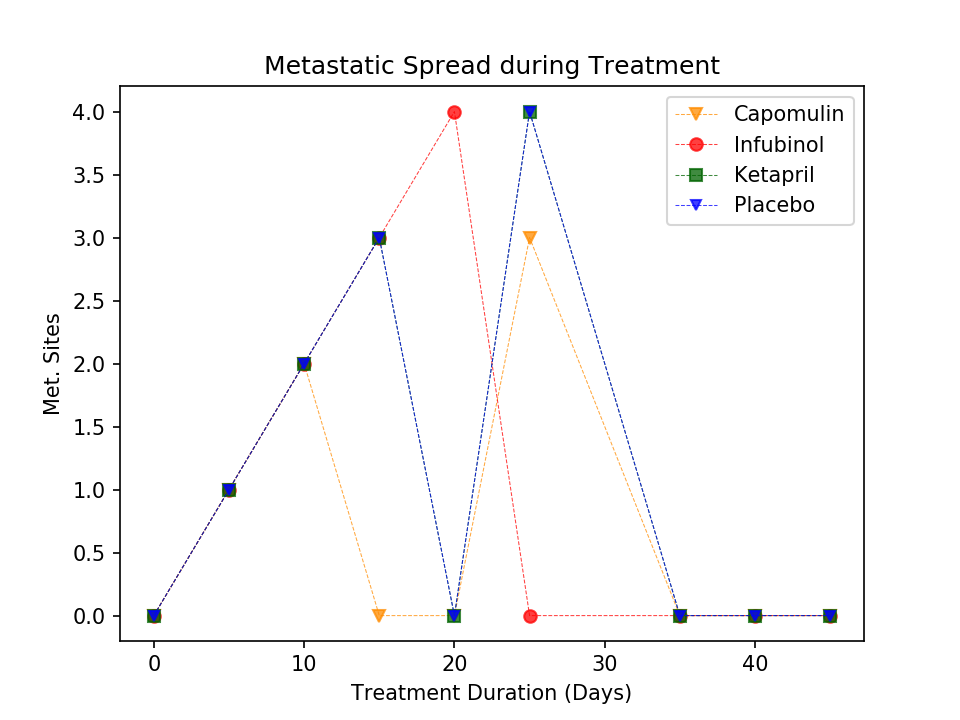

In [65]:
plt.figure()

Capomulin = plt.errorbar(Pymaceuticals_metastatic_sites_reset['Timepoint'],Pymaceuticals_metastatic_sites_reset["Capomulin"], marker="v",  color="darkorange", linestyle='--', linewidth=0.5
         ,alpha=0.75, label="Capomulin")

Infubinol = plt.errorbar(Pymaceuticals_metastatic_sites_reset['Timepoint'],Pymaceuticals_metastatic_sites_reset["Infubinol"], marker="o", color="red",  linestyle='--', linewidth=0.5
            ,alpha=0.75, label="Infubinol")

Ketapril = plt.errorbar(Pymaceuticals_metastatic_sites_reset['Timepoint'],Pymaceuticals_metastatic_sites_reset["Ketapril"], marker="s", color="darkgreen", linestyle='--', linewidth=0.5
           ,alpha=0.75, label="Ketapril")

Placebo = plt.errorbar(Pymaceuticals_metastatic_sites_reset['Timepoint'],Pymaceuticals_metastatic_sites_reset["Placebo"], marker="v", color="blue",markersize=5, linestyle='--', linewidth=0.5
            ,alpha=0.75, label="Placebo")

In [66]:
# Add labels to the x and y axes
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

Text(63.9583,0.5,'Met. Sites')

In [67]:
# Create a legend for the chart
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")

In [ ]:
# Create a list from 0 to 55 with each step being 5 higher than the last# Create  
# plt.figure()

x_axis = np.arange(0,x_axis_range+5, 5)

x_limit = 45 

plt.figure(figsize=(8,5))

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, Pymaceuticals_metastatic_sites_reset["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, Pymaceuticals_metastatic_sites_reset["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, Pymaceuticals_metastatic_sites_reset["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = Pymaceuticals_analysis_sem["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, Pymaceuticals_metastatic_sites_reset["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, x_limit)

plt.title('Metastatic Spread during Treatment', fontsize=20)
plt.xlabel('Treatment Duration (Days)', fontsize=14)
plt.ylabel('Met.Sites', fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [ ]:
# WIP